# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

- Does the Smartcab move at all during the simulation?
        Nope, the Smartcab was idled in the same place.

- What kind of rewards is the driving agent receiving?
        The reward was either positive or negative scalar number.


- How does the light changing color affect the rewards?
        Generally speaking, the agent was rewarded positively when idling at a red light, but was rewarded negatively (punished) when idling at a green light. The reward for idling at a red light is around 1.5 to 2.5, and the reward for idling at green light is around -4.5 to -5.5. Additionally, the absolute value of punishment is about twice as much as reward.


### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

- In the agent.py Python file, choose three flags that can be set and explain how they change the simulation.
        num_dummies - This can change number of dummies in the simulation. Intuitively, the more the dummies, the more accident will occur and the more time will be needed to reach the destination
        grid_size   - This will change the size and number of intersection of the simulation
        enforce_deadline - This will set a deadline for an agent to meet. I also observed when this is set to `True`, the reward for idling at red light is less than that when enforce_deadline is set to `False`.
        
- In the environment.py Python file, what Environment class function is called when an agent performs an action?
        The `act()` function will be called when agent performs an action. This function takes the agent and the action as input, and performs an action and rewards the agent as output.


- In the simulator.py Python file, what is the difference between the 'render_text()' function and the 'render()' function?
        The `render_tet()` method will update the status by prompting messages in the console. Whereas `render()` method will update the status by updating both the text and the graphic in the pygame GUI.


- In the planner.py Python file, will the 'next_waypoint() function consider the North-South or East-West direction first?
        It consideres East-West direction first. Because the function put the elif statement of dx in front of that of dy.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


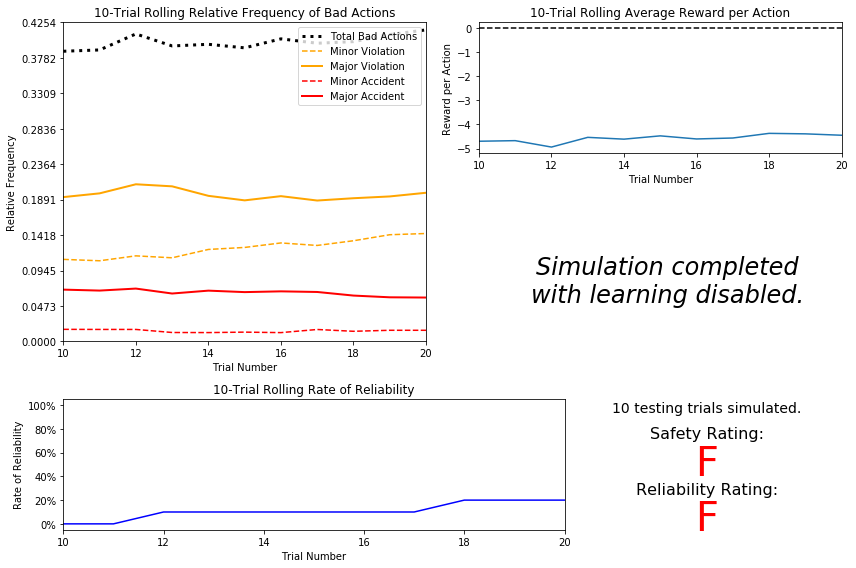

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
Based on the log file and visualized data, we can see that:
1. There's over 38% to 41% of the decision are bad decisions.
2. There's around 8% of the decisions caused accidents. In other words, around 20% of the **bad decisions** will cause accidents.
3. The reliability rating is F. Giving that the agent was driving randomly, this rating would make sense.
4. The average reward of each action was lower than -4 throughout the test. It seems that the agent was being penalized heavily for most of its action.
5. The result did not change significantly.
6. The policy of Smarcab should be considered neither safe nor reliable. Becuase based on the measure system, the ratings of both safety and reliability are F.


-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

At a glance, it seems to me that all the features are relevent for learning safety and efficiency except `deadline`. However, to simplify the problem, we can assume that all the other dummy-agents are obeying the traffic regulation, and that making right turn during red light is unnecessary to reach the destination on time. 
Therefore, we can conclude the usefulness of each feature as followed:

Necessary features:
- `waypoint` - this feature is crucial for agent to know which direction to drive in order to reach the destination. Without this feature, the agent may never reach the destination. Therefore, this feature would definitely affect the efficiency. Unless we can use value/utility function to guide the agent, which is not in our case.

- `light` - this feature is a major feature for agent to obey the traffic rules. Since the safety would rate under C if agent run throught red light at least once during one simulation. Moreover, the major accident only happens when the agent try to pass during red light. Therefore, for the safety rating, the best policy is to remain idle during red light.

Unnecessary features:
- `left`, `right`, and `concoming` - those features are similar, all describe the intended direction of other agents in each direction. However, by applying our assumption, all dummy agents will obey the traffic rules, we won't need those data/feature if we can decide that the only action for red light is to be idle. In other words, those features become handy only when we want the agent to learn how to turn right safely during red light.
By eliminating the opportunity to turn right during red light, it might impact the reliability since it would take more time to get to the destination. However, if we carefully examine the environment, we can find that for any given round, the agent will only need to turn right at most twice. This suggest that even if we try to teach the agent to turn right safely during red light, we will only save at most two steps. But to the cost to save those two steps, we need to include 2 more features, adding a lot more dimention to our training model. (The `right` feature would be irrelevant for learning to turn right if U-turn is not considered)

**Argument to the first review**
My feedback from the first project review required me to include `oncoming` feature. The arguement states that "As the agent must yield to oncoming traffic going right or forward when the agent want to go left at a green light." However if we look at the code from environment.py
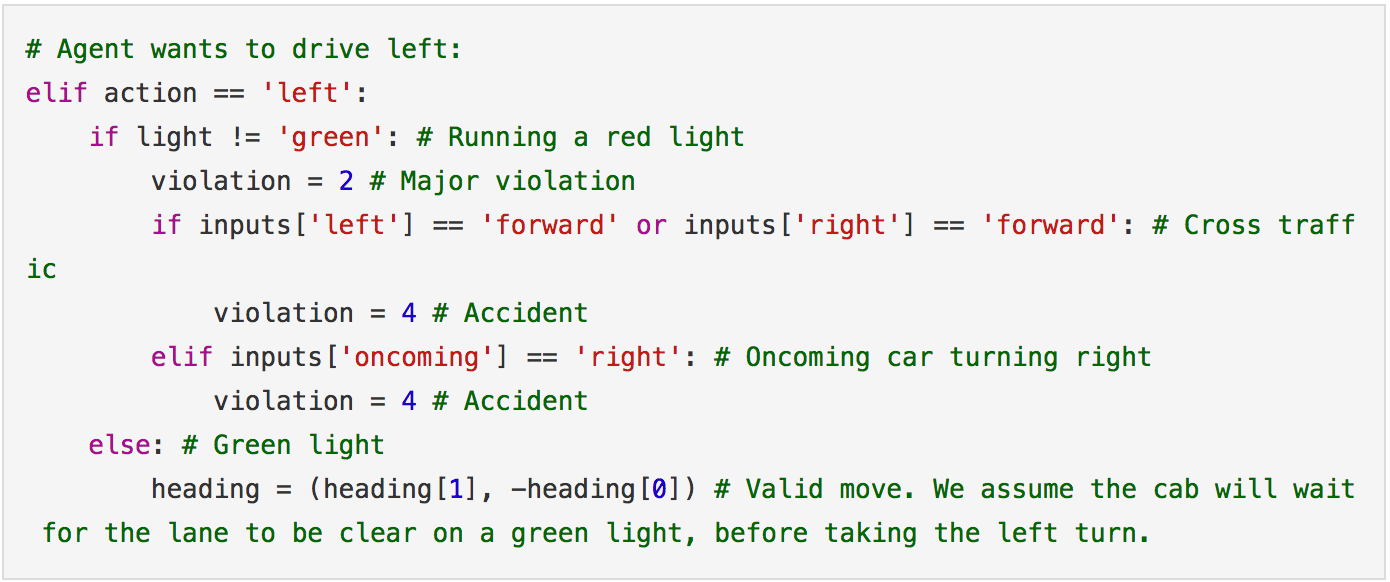

The code literally states that it assumes that the agent will wait for the lane to be clear on a green light, before taking the left turn. In other words, if we look at the violation or reward aspect, there will be no violation or penalty to turn left at green light at any condition. Thus, `oncoming` may be an important feature in the real case, but irrelevant in our case. Therefore, I would like to stick to my original answer.

- `deadline` would be unessary as well. Although this feature provides reference for deciding trade-offs between safety and efficiency, it really doesn't help to raise the total rating. For example, even if we know the deadline is close, should we cross the intersection during the red light? If not, the rating for efficiency will be low. If yes, the rating for safety will be under C. Therefore, this feature won't help much when the deadline is tight or the traffic is congested. Because either way we need to sacrifice either safety or efficiency. 

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

I've picked two features: `waypoint`, `light`. The `waypoint` have 3 different states, `left`, `forward`, and `right`. The `light` feature has 2 state: `green` and `red`. Therefore, we will have 2X3 = 6 different states. Considering there's 4 possible actions, `None`, `left`, `forward`, and `right`, we need to consider 6X4 = 24 different combination between states and actions. I would think this amount of combination can be learned quite easily if the agent go through around 25 training trials. Because, assuming each training trail well have at least 10 steps, the agent would have chance to experience each combination 10 times in average. I think such number is enough for the learning algorithm to converge in each state and action.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

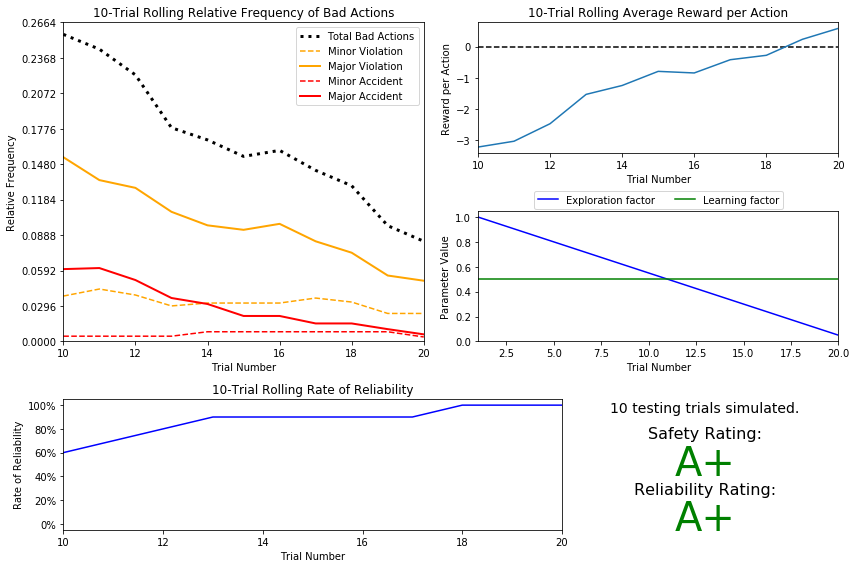

In [4]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
Some oberservations and analyses are as following:
1. We can see that both agents have similar high rate of bad decision and similar low reward per action at the beginning of the training trial. Secondly, both agents went through 20 training trials before testing.
2. The driving agent went through 20 training trails before test. This number is correct since that we set the epsilon-tolerance as 0.05, and that the epsilon decreases 0.05 for each training trial – taking exactly 19 trails for epsilon to be smaller than 0.05.
3. The implemented$\epsilon$ is $$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$
Therefore, the $\epsilon$ should decrease linearly along the trial number.
4. As the number of training trials increased, we can clearly see that the bad actions has decreased, that the average reward has increased, and that the rate of reliability has increased. This indicates that the agent is improving its behavior through learning.
5. Both the rating of Safety and reliability has improved from F to A+.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

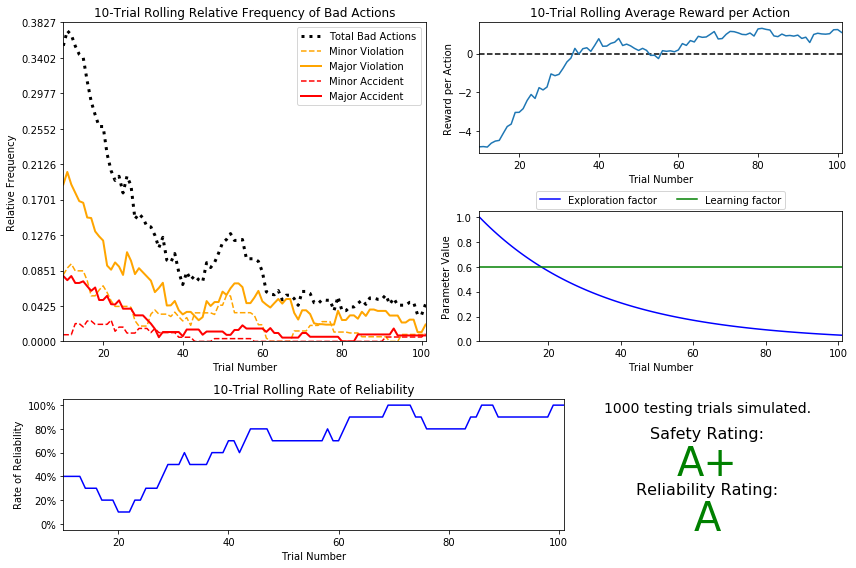

In [6]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
I used $\epsilon_{t} = e^{-0.03t}$ as my decaying function. Since the training trail will stop when $\epsilon$ reached 0.05, the training will stop when $-0.03t <= -3.000$. This means the $t >= 100$. Therefore, the Q-learning will run through 100 trainings before running into test trails. We can see that if we increase the $a = -0.03$ closer to zero, the $\epsilon$ will decay more slowly to the tolerance, thus more training trails will be subjected. The reason I use exponential function is that, unlike $1/t$ or $1/t^2$ it has nice feature ($at$) to control how fast the function decay from 1 to 0.05. 
Furthermore, the profile of the exponential decay much slower than that of $1/t$ in the beginning of the training(however, faster than $\epsilon_{t+1} = \epsilon_{t} -0.05$), giving the agent more space to explore the possible options.

I've used $\alpha = 0.6 $ and epsilon-tolerance=0.05. First of all, I did not change the epsilon-tolerance since it works well. I can see that by decreasing the epsilon-tolerance, the $\epsilon$ will reach the tolerance after more training trails. Also there will be less turbulence or exploration at the end of the training trails. Therefore, smaller the tolerance will lead to more training trails but less exploration for the last few training trails. 

On the other hand, I've increased $\alpha$ from 0.5 to 0.6. The reason is that the comparing to the default setting the $\epsilon$ tend to decay faster but stays in a smaller value in the last few training trails. Therefore, I deided to increase the learning rate a little to compensate the fast decaying exploration rate. And since the exploration rate will remain in a smaller threshhold at the end of the training trail, a slightly higher alpha won't be able to cause the policy to diverge too much away from the global optimal value.

Comparing the Q-Learner to default Q-Learnner, we can see that the total bad decisions has decreased slower, that the rate of reliability has increased slower, and that the average reward per action has increased slower. However, giving more training trails, the final value of each aspect has reached in a stable and satisfying state. Although the rating for reliability is slightly lower than that of default learing, the rating is based on 1000 test trails. Therefore, we will have higher confidence level of the rating. And I am extremely satisfied by the rating for safety since we got the highest rating for 1000 test trails and the agent has learned to do this within 100 training trails.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

To summarize the policy, we can first look at all the possible state given to the agent. There's only 6 different state, 2 different states for `light`, and 3 different states for `waypoint`. Since we only know the color of the light and the direction we should go, the best policy to get best rating in both safety and reliability is to stop whenever the light is red, and go whatever waypoint directed when light is green. We summarize as following:
1. Stop when the light is red.
2. Go what waypoint indicates when the light is green.

To verify our speculated policy, we can examine the following Q-table from `'sim_improved-learning.txt'` as following:

| `waypoint` | `light`  |`forward`|`None`|`right`|`left`|
|:-----------|----------|---------|------|-------|------|
|`forward`   |<font color='red'> 'red' </font>   | -17.54   | **2.05** |0.48 |-12.37 |
|`right`     |<font color='red'> 'red' </font>   | -27.20   | **1.07** | -10.99 |-12.66|
|`left`      |<font color='red'> 'red' </font>   | -10.53  | **1.76** | -11.17  | -9.28|
|                                                       | 
|`forward`   |<font color='green'> 'green' </font> |   **2.51**  |-4.77 |  0.93 | 0.80 |
|`right`     |<font color='green'> 'green' </font> |   0.24  |-4.23 |  **1.38** | 1.17 |
|`left`      |<font color='green'> 'green' </font> |   1.01  |-4.79 |  0.98 | **1.73** |

For the first 3 states, all the lights are red, and the `none` action gets the highest reward. For the lower 3 states, we can find that the lights are green, and that the action, which identical to the `waypoint` has the highest reward. Therefore, we can see that the Q-table provides identical policy as speculated above.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

I would guess the future rewards won't work in this project for the following possible reasons:
1. The feature `waypoint` has already worked as a guidence for the agent. The future rewards will provide similar function but in a more complicated way.
2. We cannot really calculate the utility of each position to full converge since the rewards of each **geographical** state are stochastic. I would imaging the correct utility value of each intersection will change overtime, depends on the location of different dummy agent.
3. The future rewards tend to minimize the number of steps reaching the final destination. However, in our case, reaching the destination is only one objective. Considering the rubric of both safety and reliability rating, the rating only ask the agent to reach the destination on time rather than the sooner the better. Furthermore, if the future rewards out weighs the rewards not having violation, then the rating of saftey will be decreased.

**From the first project review** two points are mentioned:
- agent - Think about what type of environment the agent is a part of. Does the agent have a full view of the entire grid? Only a certain aspect of it?
- environment - How about the destination itself? Does it change throughout the trials runs? Why would this matter?

I'm not sure if agent has full view or partial aspect of the entire grid. Because if we only look at the states, there's certainly not a full view of entire grid. However, if we look at the `waypoint` feature, it is derived from the grid. On the other hand, I would argue if we already know the best route to the destination (indicated by `waypoint`), there's no need to look at the full view of the grid. 

As for the environment, the destination definitely changes in different trails. This is important, since we need to recalculate the utility value of each grid for different destination.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.